<a href="https://colab.research.google.com/github/xthecapx/03MIAR---Algoritmos-de-Optimizacion/blob/main/Cristian_Marquez_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG2 - Actividad Guiada 2
Nombre: Cristian Daniel Marquez Barrios

Link: https://colab.research.google.com/drive/1XFVJ5aw1j-5ffEEmvTtkoC3lnSDyYoKG?usp=sharing

Github: https://github.com/xthecapx/03MIAR---Algoritmos-de-Optimizacion/blob/main/Cristian_Marquez_AG2.ipynb

Este trabajo cuenta con la actividad extra y con una versión del descenso del gradiente


In [ ]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

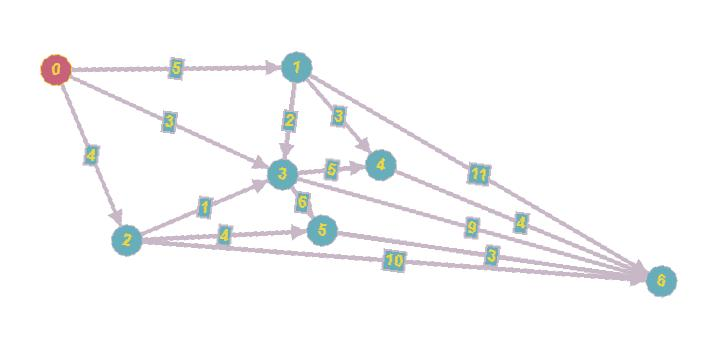

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
# Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
    [0, 5, 4, 3, float("inf"), 999, 999],  # desde nodo 0
    [999, 0, 999, 2, 3, 999, 11],  # desde nodo 1
    [999, 999, 0, 1, 999, 4, 10],  # desde nodo 2
    [999, 999, 999, 0, 5, 6, 9],
    [999, 999, 999, 999, 0, 999, 4],
    [999, 999, 999, 999, 999, 0, 3],
    [999, 999, 999, 999, 999, 999, 0]
]

# 999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [ ]:
# Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
    ################################################################
    # Total de Nodos
    N = len(TARIFAS[0])

    # Inicialización de la tabla de precios
    PRECIOS = [[9999]*N for i in [9999]*N]  # n x n
    RUTA = [[""]*N for i in [""]*N]

    # Se recorren todos los nodos con dos bucles(origen - destino)
    #  para ir construyendo la matriz de PRECIOS
    for i in range(N-1):
        for j in range(i+1, N):
            MIN = TARIFAS[i][j]
            RUTA[i][j] = i

            for k in range(i, j):
                if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
                    MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j])
                    RUTA[i][j] = k
                PRECIOS[i][j] = MIN

    return PRECIOS, RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)  
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i]) 

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) 

print("\nLa ruta es:")  
calcular_ruta(RUTA, 3,6) 


La ruta es:


3

##Problema de Asignacion de tarea

In [ ]:
# Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES = [[11, 12, 18, 40],
          [14, 15, 13, 22],
          [11, 17, 19, 23],
          [17, 14, 20, 28]]

In [ ]:
# Calculo del valor de una solucion parcial
def valor(S, COSTES):
    VALOR = 0
    for i in range(len(S)):
        VALOR += COSTES[S[i]][i]
    return VALOR


valor((3, 2,), COSTES)

34

In [ ]:
# Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S, COSTES):
    VALOR = 0
    # Valores establecidos
    for i in range(len(S)):
        VALOR += COSTES[i][S[i]]

    # Estimacion
    for i in range(len(S), len(COSTES)):
        VALOR += min([COSTES[j][i] for j in range(len(S), len(COSTES))])
    return VALOR


def CS(S, COSTES):
    VALOR = 0
    # Valores establecidos
    for i in range(len(S)):
        VALOR += COSTES[i][S[i]]

    # Estimacion
    for i in range(len(S), len(COSTES)):
        VALOR += max([COSTES[j][i] for j in range(len(S), len(COSTES))])
    return VALOR


CI((0, 1), COSTES)

68

In [ ]:
# Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
# (0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
    HIJOS = []

    for i in range(N):
        if i not in NODO:
            HIJOS.append({'s': NODO + (i,)})

    return HIJOS

In [ ]:
crear_hijos((0,), 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [ ]:
def ramificacion_y_poda(COSTES):
    # Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
    # Nodos del grafo { s:(1,2), CI:3, CS:5 }
    # print(COSTES)
    DIMENSION = len(COSTES)
    MEJOR_SOLUCION = tuple(i for i in range(len(COSTES)))
    CotaSup = valor(MEJOR_SOLUCION, COSTES)
    # print("Cota Superior:", CotaSup)

    NODOS = []
    NODOS.append({'s': (), 'ci': CI((), COSTES)})

    iteracion = 0

    while (len(NODOS) > 0):
        iteracion += 1

        nodo_prometedor = [min(NODOS, key=lambda x:x['ci'])][0]['s']
        # print("Nodo prometedor:", nodo_prometedor)

        # Ramificacion
        # Se generan los hijos
        HIJOS = [{'s': x['s'], 'ci':CI(x['s'], COSTES)}
                 for x in crear_hijos(nodo_prometedor, DIMENSION)]

        # Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
        NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION]
        if len(NODO_FINAL) > 0:
            # print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
            if NODO_FINAL[0]['ci'] < CotaSup:
                CotaSup = NODO_FINAL[0]['ci']
                MEJOR_SOLUCION = NODO_FINAL

        # Poda
        HIJOS = [x for x in HIJOS if x['ci'] < CotaSup]

        # Añadimos los hijos
        NODOS.extend(HIJOS)

        # Eliminamos el nodo ramificado
        NODOS = [x for x in NODOS if x['s'] != nodo_prometedor]

    print("La solucion final es:", MEJOR_SOLUCION, " en ",
          iteracion, " iteraciones", " para dimension: ", DIMENSION)


print(COSTES)
ramificacion_y_poda(COSTES)

[[11, 12, 18, 40], [14, 15, 13, 22], [11, 17, 19, 23], [17, 14, 20, 28]]
La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


# Ejercicio:

- Generar matrices con valores aleatorios de mayores
dimensiones (5,6,7,…) y ejecutar ambos algoritmos.

In [ ]:
import random

def generate_random_matrix(rows, columns):
    matrix = []

    for i in range(rows):
        matrix.append([random.randint(10,40) for j in range(columns)])

    return matrix

# Ejemplo de uso:
matrix = generate_random_matrix(3, 10)
print(matrix)

[[40, 38, 13, 15, 28, 30, 15, 31, 13, 36], [16, 38, 17, 31, 38, 11, 22, 15, 33, 25], [20, 32, 26, 31, 40, 39, 10, 19, 21, 17]]


In [ ]:
data = generate_random_matrix(11, 11)
print(data)
%timeit ramificacion_y_poda(data)

[[37, 27, 32, 30, 17, 14, 32, 38, 17, 39, 35], [23, 34, 38, 22, 27, 37, 37, 39, 20, 13, 29], [15, 27, 19, 18, 39, 10, 15, 27, 21, 37, 37], [11, 32, 40, 13, 37, 15, 16, 35, 34, 24, 13], [39, 23, 17, 15, 23, 33, 22, 22, 30, 23, 28], [19, 34, 11, 29, 16, 40, 32, 26, 11, 24, 40], [12, 29, 36, 17, 15, 17, 24, 39, 37, 37, 14], [21, 22, 19, 24, 25, 35, 36, 35, 15, 29, 11], [13, 28, 26, 11, 36, 37, 15, 19, 15, 25, 36], [31, 10, 10, 10, 23, 40, 37, 14, 14, 38, 33], [10, 27, 25, 19, 37, 13, 27, 31, 15, 17, 22]]
La solucion final es: [{'s': (8, 9, 5, 0, 3, 2, 4, 10, 6, 1, 7), 'ci': 159}]  en  2188  iteraciones  para dimension:  11
La solucion final es: [{'s': (8, 9, 5, 0, 3, 2, 4, 10, 6, 1, 7), 'ci': 159}]  en  2188  iteraciones  para dimension:  11
La solucion final es: [{'s': (8, 9, 5, 0, 3, 2, 4, 10, 6, 1, 7), 'ci': 159}]  en  2188  iteraciones  para dimension:  11
La solucion final es: [{'s': (8, 9, 5, 0, 3, 2, 4, 10, 6, 1, 7), 'ci': 159}]  en  2188  iteraciones  para dimension:  11
La soluci

In [ ]:
import itertools

def fuerza_bruta(COSTES):
    mejor_valor = 10e10
    mejor_solucion = ()

    for s in list(itertools.permutations(range(len(COSTES)))):
        valor_tmp = valor(s, COSTES)
        if valor_tmp < mejor_valor:
            mejor_valor = valor_tmp
            mejor_solucion = s

    # print(f"la mejor solucion es {mejor_solucion} con valor: {mejor_valor}")

fuerza_bruta(COSTES)

In [ ]:
data = generate_random_matrix(10, 10)
print(data)
%timeit fuerza_bruta(data)

[[32, 27, 17, 20, 34, 17, 18, 37, 27, 39], [11, 10, 21, 15, 26, 35, 19, 31, 36, 21], [13, 21, 30, 37, 12, 29, 36, 37, 40, 15], [12, 18, 32, 19, 27, 15, 27, 23, 31, 10], [22, 16, 15, 25, 12, 12, 29, 33, 32, 24], [22, 30, 28, 13, 36, 36, 36, 35, 12, 20], [26, 15, 16, 19, 29, 26, 11, 21, 14, 22], [25, 30, 18, 15, 39, 29, 24, 38, 29, 30], [22, 39, 20, 23, 10, 39, 11, 14, 26, 22], [36, 31, 15, 21, 17, 30, 15, 29, 31, 31]]
6.39 s ± 713 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
data = generate_random_matrix(11, 11)
print(data)
%timeit fuerza_bruta(data)

[[22, 17, 32, 14, 40, 19, 32, 23, 20, 15, 34], [22, 30, 10, 24, 35, 14, 13, 34, 23, 37, 34], [24, 36, 15, 23, 38, 27, 12, 30, 40, 16, 33], [24, 12, 34, 30, 16, 21, 26, 14, 14, 23, 25], [37, 16, 13, 31, 39, 38, 39, 25, 17, 28, 18], [19, 11, 11, 20, 13, 15, 38, 40, 25, 28, 11], [32, 18, 15, 18, 36, 37, 24, 35, 25, 11, 20], [34, 14, 34, 39, 14, 26, 15, 20, 11, 12, 34], [16, 35, 25, 21, 19, 20, 38, 15, 30, 20, 17], [30, 11, 31, 33, 28, 37, 24, 19, 39, 28, 10], [12, 11, 32, 11, 12, 34, 31, 29, 38, 35, 32]]
1min 12s ± 2.57 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


- ¿A partir de que dimensión el algoritmo por fuerza bruta
deja de ser una opción?

Según el profiler, el sistema se consume más de las 12 Gigas de ram disponibles en el collab, a partir de las 12 dimensiones.

Adicionalmente, para 11 dimensiones la fuerza bruta toma `1 min 12s ± 2.57 s` en promedio para ejecutar el código. Comparado con los `557 ms ± 77.5 ms` que le toma al algoritmo de ramifica y poda.



In [ ]:
data = generate_random_matrix(30, 30)
print(data)
%timeit ramificacion_y_poda(data)

[[32, 24, 31, 26, 39, 31, 28, 37, 11, 15, 11, 10, 20, 39, 22, 27, 33, 30, 26, 17, 34, 20, 38, 31, 21, 23, 36, 31, 31, 22], [27, 39, 26, 38, 33, 19, 37, 26, 29, 11, 29, 11, 28, 16, 36, 32, 17, 16, 32, 26, 33, 11, 26, 31, 36, 14, 37, 24, 35, 18], [26, 11, 17, 22, 31, 38, 15, 11, 35, 21, 21, 14, 38, 39, 31, 13, 27, 11, 11, 14, 15, 23, 13, 39, 23, 31, 16, 37, 15, 12], [39, 24, 34, 19, 11, 15, 30, 11, 33, 33, 12, 21, 40, 32, 21, 12, 35, 27, 31, 21, 10, 33, 38, 15, 12, 10, 26, 34, 12, 40], [37, 30, 29, 32, 36, 18, 21, 15, 11, 11, 34, 37, 26, 15, 25, 32, 31, 34, 35, 31, 15, 40, 22, 29, 11, 39, 39, 16, 24, 32], [28, 31, 39, 21, 39, 33, 22, 24, 22, 23, 27, 24, 22, 18, 24, 20, 28, 14, 28, 22, 11, 23, 39, 26, 23, 10, 14, 32, 33, 14], [19, 31, 32, 37, 37, 31, 20, 18, 31, 15, 28, 16, 15, 13, 19, 12, 20, 23, 15, 17, 39, 13, 32, 28, 33, 38, 13, 17, 20, 17], [16, 28, 24, 19, 25, 29, 19, 39, 38, 20, 30, 16, 24, 36, 17, 17, 32, 34, 26, 30, 35, 31, 22, 11, 22, 10, 26, 35, 21, 20], [31, 10, 30, 30, 15, 25

KeyboardInterrupt: ignored

- ¿Hay algún valor de la dimensión a partir de la cual el
algoritmo de ramificación y poda también deja de ser una
opción válida?

En el bloque de ejecución anterior se hizo el experimento de correr la función en 7 ocasiones con una dimensión de 30. El resultado, durante la ejecución no se evidenció un consumo desmesurado de la memoria RAM, por lo que considero que el valor al cual la solución de ramifica y poda deja de funcionar es bastante alto comparado con el de fuerza bruta. El algoritmo corrió por 43 minutos y no encontro terminó la ejecución, pues con `%timeit` se realizan 7 ejecuciones.

##Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!) 
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
# Definimos la funcion
# Paraboloide
def f(X): return X[0]**2 + X[1]**2  # Funcion
def df(X): return [2*X[0], 2*X[1]]  # Gradiente

df([1, 2])

[2, 4]

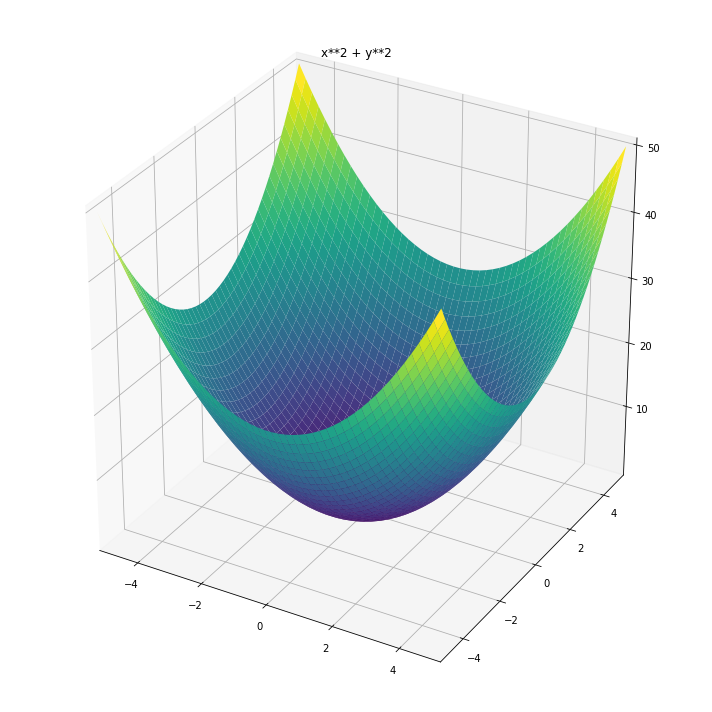

In [ ]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x, y = symbols('x y')

plot3d(x**2 + y**2,
       (x, -5, 5), (y, -5, 5),
       title='x**2 + y**2',
       size=(10, 10))

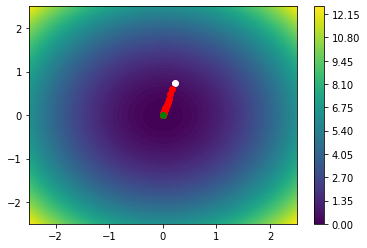

Solucion: [3.130511247212277e-06, 1.0582021032914596e-05] 1.2177926980996947e-10


In [ ]:
# Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango = 2.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

# Pinta el mapa de niveles de Z
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

# Generamos un punto aleatorio inicial y pintamos de blanco
P = [random.uniform(-2, 2), random.uniform(-2, 2)]
plt.plot(P[0], P[1], "o", c="white")

# Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA = .1

# Iteraciones:500
for _ in range(50):
    grad = df(P)
    # print(P,grad)
    P[0], P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
    plt.plot(P[0], P[1], "o", c="red")

# Dibujamos el punto final y pintamos de verde
plt.plot(P[0], P[1], "o", c="green")
plt.show()
print("Solucion:", P, f(P))

**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
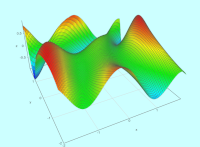


$f'(x) = cos(1/2 * x^2 - 1/4 * y^2 + 3) * (-sin(2x + 1 - e^y) * 2x) - sin(1/2 * x^2 - 1/4 * y^2 + 3) * sin(2x + 1 - e^y)$

$f'(y) = cos(1/2 * x^2 - 1/4 * y^2 + 3) * (-sin(2x + 1 - e^y) * (-1/2y)) - sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2x + 1 - e^y) * (-e^y)$

In [ ]:
# Definimos la funcion
def f(X): return math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) * math.cos(2*X[0] + 1 - math.exp(X[1]))

def df(X):
    dx0 = math.cos(1/2 * X[0]**2 - 1/4 * X[1] ** 2 + 3) * (math.cos(2*X[0] + 1 -
                                                                    math.exp(X[1])) - math.sin(1/2 * X[0]**2 - 1/4 * X[1] ** 2 + 3) * (X[0]))
    dx1 = math.cos(1/2 * X[0]**2 - 1/4 * X[1] ** 2 + 3) * (-1/2 * math.sin(
        2*X[0] + 1 - math.exp(X[1])) - math.sin(1/2 * X[0]**2 - 1/4 * X[1] ** 2 + 3) * (X[1]))

    return [dx0, dx1]

In [ ]:
df([1, 1])

[-1.0625002765892704, 0.03062726082805454]

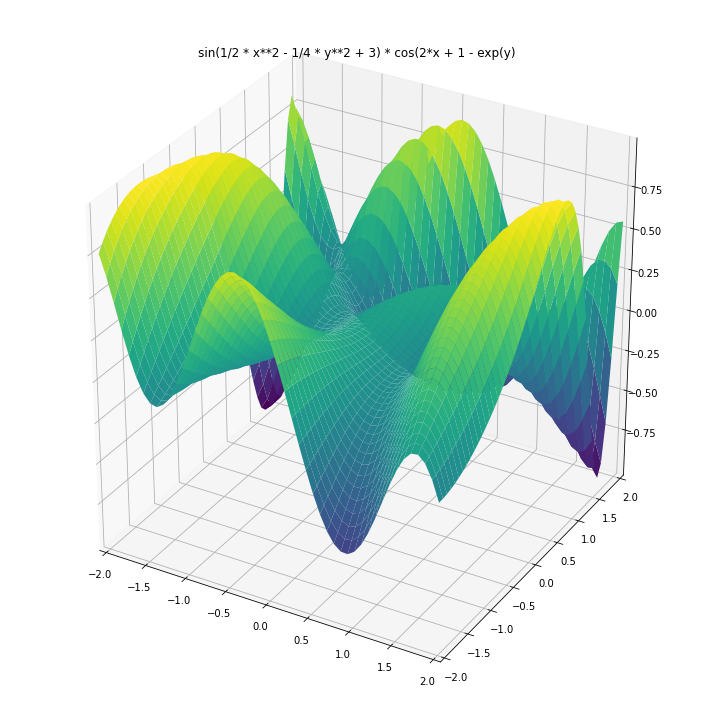

In [ ]:
from sympy import sin, cos, exp
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d

x, y = symbols('x y')

plot3d(sin(1/2 * x**2 - 1/4 * y**2 + 3) * cos(2*x + 1 - exp(y)),
       (x, -2, 2), (y, -2, 2),
       title='sin(1/2 * x**2 - 1/4 * y**2 + 3) * cos(2*x + 1 - exp(y)',
       size=(10, 10))

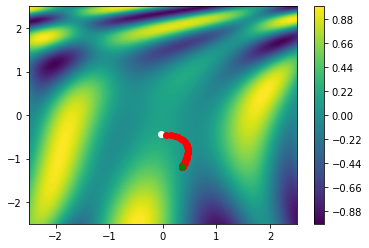

Solucion: [0.3643310737886543, -1.1840146071159876] 0.060968777659502815


In [ ]:
# Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango = 2.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))
for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[iy, ix] = f([x, y])

# Pinta el mapa de niveles de Z
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

# Generamos un punto aleatorio inicial y pintamos de blanco
P = [random.uniform(-2, 2), random.uniform(-2, 2)]
plt.plot(P[0], P[1], "o", c="white")

# Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA = .1

# Iteraciones:500
for _ in range(50):
    grad = df(P)
    # print(P,grad)
    P[0], P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
    plt.plot(P[0], P[1], "o", c="red")

# Dibujamos el punto final y pintamos de verde
plt.plot(P[0], P[1], "o", c="green")
plt.show()
print("Solucion:", P, f(P))